# Data and Samppling Distributions.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import *
import scipy.stats as st

In [26]:
# data
player_data = pd.read_csv("nfl-big-data-bowl-2022/players.csv")

## Random Sampling

#### Sample, A subset from a larger data set.
#### Population, The larger data set or idea of a data set.
#### N(n), The size of the population (sample).
#### Random Sampling, Drawing elements into a sample at random.
#### Stratified Sampling, Dividing the population into strata and randomly sampling from each strata.
#### Stratum, A homogeneous subgroup of a population with common characteristics.
#### Simple Random Sample, The sample that results from random sampling without stratifying the population.
#### Bias, Systematic error.
#### Sample Bias, A sample that misrepresents the population.

## Selection Bias

#### Selection Bias, Bias resulting from the way in which observations are selected.
#### Data Snooping, Extensive hunting through data in search of something interesting.
#### Vast search effect, Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

# Sampling Distribution of a Statistic.

In [27]:
player_data["height_inches"] = player_data.height.apply(lambda x: int(x.split("-")[0])*12 + int(x.split("-")[1]) if "-" in x else int(x))

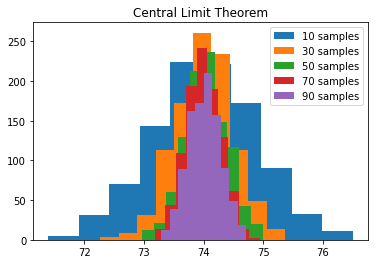

In [29]:
# Central Limit Theorem. The tendency of the sampling distribution to take on a normal shape as sample size rises.
sample_amount = range(10,100,20)
for x in sample_amount:
    samples = []
    for i in range(1000):# 1000 refers to the number of times we will find the mean for the sample.
        samples.append(player_data["height_inches"].sample(x).mean())
    plt.hist(samples)
    plt.legend([str(z) + " samples" for z in sample_amount])
    plt.title("Central Limit Theorem")

In [30]:
# standard error, The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).
player_data["height_inches"].sem()

0.05065243293253027

## Boot Strapping

#### A sample taken with replacement from an observed data set.


In [47]:
results = []
for nrepeat in range(1000):
    sample = resample(player_data["height_inches"])
    results.append(sample.mean())
results = pd.Series(results)
print("BootStrap Statistics")
print("Original:" + str(player_data["height_inches"].mean()))
print("Bias:" + str(results.mean()-player_data["height_inches"].mean()))
print("Std.Error:" + str(results.std()))

BootStrap Statistics
Original:74.0106149341142
Bias:-0.00016691068813656784
Std.Error:0.052052968754832084


## Confidence Interval

In [51]:
# Confidence level, The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.
# If we have fewer than 30 items in our sample then we can use the t-distribution.
data = player_data["height_inches"].sample(20)
st.t.interval(alpha=0.95,df=len(data)-1, loc= np.mean(data), scale= st.sem(data))

(71.9517311015031, 74.34826889849691)

In [52]:
# otherwise we can use the normal distribution as we can assume the sample mean is normally distributed.
np.random.seed(0)
data = player_data["height_inches"].sample(1500)
st.norm.interval(alpha=0.95, loc= np.mean(data), scale= st.sem(data))

(73.92590128473445, 74.19009871526556)

## Normal and Gaussian Distribution

### Error
#### The difference between a data point and a predicted or average value.
### Standardize
#### Subtract the mean and divide by the standard deviation.
### z-score
#### The result of standardizing an individual data point.
### Standard normal
#### A normal distribution with mean = 0 and standard deviation = 1.
### QQ-Plot
#### A plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution.

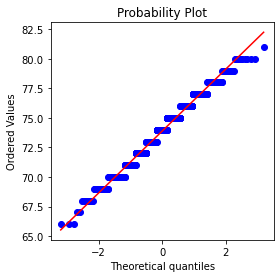

In [55]:
# qq-plot , quantile quantile distribution.
fig, ax = plt.subplots(figsize= (4,4))
nor_sample = player_data["height_inches"].sample(1000)
st.probplot(nor_sample, plot = ax)
plt.show()

### Long Tailed Distributions

In [56]:
# Tail, The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.
# Skew, Where one tail of a distribution is longer than the other.

### Binomial Distribution

In [62]:
# PMF, tells us the probablity that an event will happen a certain number of times given a certain number of samples and probailities for success.
st.binom.pmf(2, n=5, p=0.1) #(number of successes we like, number of trials conducted, probability of success in each trial)

0.0729

In [61]:
# CDF tells us the probability that an event will happend a certain number of fewer times.
st.binom.cdf(2, n=5, p=0.1)

0.99144

### Poisson Distribution

In [65]:
# Lambda, The rate (per unit of time or space) at which events occur.
# Poisson Distribution, The frequency distribution of the number of events in sampled units of time or space
# An example of this would be stimulating the number of calls received by a call center each minute of a 100 minute interval if we know that the center receives about 2 calls per minute.
st.poisson.rvs(2, 100) # lambda is 2

102

### Exponential Distribution

In [66]:
# Exponential Distribution, The frequency distribution of the time or distance from one event to the next event.
st.expon.rvs(0.2,100)

13.222420303557243

### Weibull Distribution

In [68]:
# weibull distribution, A generalized version of the exponential distribution in which the event rate is allowed to shift over time.
st.weibull_min.rvs(1.5,scale=5000, size=100)
# this code simulates 100 lifetimes with a shape of 1.5 and a characteristic life of 5000.

array([  313.23517778,  1450.91335689,  2979.47665807,  7357.82851806,
        2543.67970006,   763.01943274,  3048.17634019,  2119.99801432,
         746.53491062,  3187.63106078,  2861.60656758,  6027.72972224,
         810.71928248,  3050.3697838 ,  2800.64044041,  5135.03156871,
        8428.31751148,  1438.4369888 ,  7105.80109976,  4801.0052802 ,
         479.2926205 ,  6423.79701978,  4205.97212273,  6865.76297808,
        3256.89779201,  5312.26334655,  1831.25319564,  1783.29943016,
        2785.93991128,  4064.0775593 ,  5834.85662454,  5324.86830097,
        7184.14755474,  3380.06361505,  9053.33194424,  1186.51437008,
        1751.19135562,  5491.82891254,  2204.32971019,  1593.00362386,
        8395.80360308,   856.13200923, 14156.93201989,  7896.6898855 ,
        8008.03594984,  4969.21957619,  2009.07511904,  6839.73542586,
         725.76626016,  4565.58917285,  3470.6831111 ,  6221.28727539,
         416.65385051,  3103.60577113,  3745.51564366,  1505.96777773,
      